In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
import datetime
%matplotlib inline

c:\users\home_041\miniconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### This notebook we're going to see the basics about Risk and Adjusted returns
<h4>Look for the tickers below </h4>

<ul>
    <li>Nasdaq Composite(US)</li>
    <li>SP500(US)</li>
    <li>BOVESPA(BR)</li>
    <li>Down Jones ind(US)</li>
    <li>CAC40(FR)</li>
    <li>DAX(DE)</li>
    <li>Nikkey225(JPN)</li>
    <li> Hang Seng (CHN) </li>
    
</ul>

# 1 - Data mining

## 1.1 - Time Frame

<h5> selecting how many datapoints to fetch from the data </h5>

In [2]:
#2 work weeks, it's fast
#1 year to get 252 data points
delta_time = datetime.timedelta(days = 365)
end = datetime.datetime.now() #today
start = end - delta_time
print(start)
print(end)

2019-04-06 20:02:33.970726
2020-04-05 20:02:33.970726


## 1.2 -Fetching Stooq Data
<h5> selection tickers and creating ticker names </h5>

In [3]:
tickers = "^NDQ ^BVP ^DJI ^SPX ^CAC ^DAX ^NKX ^HSI".split()
ticker_names = "Nasdaq Bovespa Down_Jones_ind SP500 CAC40 DAX Nikkey225 Hang_Seng".split()

### 1.2.1 - Fetching one dataframe 

In [4]:
nasdaq = web.DataReader(tickers[0], 'stooq', start =start, end =end )
nasdaq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-03,7477.270,7518.719,7288.113,7373.082,NaN
2020-04-02,7317.453,7501.699,7307.945,7487.311,9.139958e+08
2020-04-01,7459.500,7566.371,7301.980,7360.582,9.148020e+08
2020-03-31,7740.059,7880.313,7642.863,7700.098,1.096603e+09
2020-03-30,7583.461,7784.348,7539.965,7774.151,9.297209e+08


##### Obs: something is wrong with the "start", let's fix it by conditional selection in the index

In [5]:
nasdaq = nasdaq[nasdaq.index >= start]
nasdaq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-03,7477.270,7518.719,7288.113,7373.082,NaN
2020-04-02,7317.453,7501.699,7307.945,7487.311,9.139958e+08
2020-04-01,7459.500,7566.371,7301.980,7360.582,9.148020e+08
2020-03-31,7740.059,7880.313,7642.863,7700.098,1.096603e+09
2020-03-30,7583.461,7784.348,7539.965,7774.151,9.297209e+08


### 1.2.2 - fetching all dataframes
<h5> Using exec function to create all dataframes </h5>

In [6]:
for item in range(len(tickers)):
    #bending rules here ^~
    #using exec func to create automatic pandas dataframes
    exec("%s = web.DataReader(tickers[item], \'stooq\', start = start, end = end)" %(ticker_names[item]))
    #fixing the date issue
    exec("%s = %s[%s.index >= start]" %(ticker_names[item],ticker_names[item], ticker_names[item]))
    
    #print("fetch %s dataframe"%(ticker_names[item]))

## 2 - Data Selection

### 2.1 - Selecting just the close values
<h5> creating pandas series for all close values </h5>

In [7]:
#slicing the dataframe
for item in range(len(tickers)):
    exec("%s = %s['Close']" %(ticker_names[item],ticker_names[item]))
#sorting the dataframe
for item in range(len(tickers)):
    exec("%s = %s.sort_index()" %(ticker_names[item],ticker_names[item]))    

## 2.1 - Creating Dataframes

### 2.1.1 - Creating dataframe for one ticker

In [8]:
#Creating Dataframes
Bovespa_df = pd.DataFrame(Bovespa)
Bovespa_df['pct_change'] = Bovespa.pct_change()
Bovespa_df['cum_prod'] = (Bovespa_df['pct_change']+1).cumprod()
Bovespa_df.head()

,Close,pct_change,cum_prod
Date,,,
2019-04-08,97369.29,NaN,NaN
2019-04-09,96291.79,-0.011066,0.988934
2019-04-10,95953.45,-0.003514,0.985459
2019-04-11,94754.70,-0.012493,0.973148
2019-04-12,92875.00,-0.019838,0.953843


### 2.1.2 - Creating dataframe for all tickers

In [9]:
for i in range(len(ticker_names)):
    #creating dataframe
    exec("%s_df = pd.DataFrame(%s)" %(ticker_names[i],ticker_names[i]))
    #adding columns
    exec("%s_df[\'pct_change\'] = %s.pct_change()" %(ticker_names[i],ticker_names[i]))
    exec("%s_df[\'cum_prod\'] = (%s_df[\'pct_change\']+1).cumprod()" %(ticker_names[i],ticker_names[i]))

### 2.1.3 - Creating closing , pct_change and cum_prod 

#### 2.1.3.1- Creating for one ticker

In [10]:
df_close = pd.DataFrame()
df_close['Nasdaq_close'] = Nasdaq_df[Nasdaq_df.columns[0]]

df_pct_change = pd.DataFrame()
df_pct_change['Nasdaq_pct'] =Nasdaq_df[Nasdaq_df.columns[1]]


df_cum_prod = pd.DataFrame()
df_cum_prod['Nasdaq_cum'] = Nasdaq_df[Nasdaq_df.columns[2]]


In [11]:
print(df_close, df_cum_prod)

            Nasdaq_close
Date                    
2019-04-08      7953.880
2019-04-09      7909.280
2019-04-10      7964.240
2019-04-11      7947.360
2019-04-12      7984.160
...                  ...
2020-03-30      7774.151
2020-03-31      7700.098
2020-04-01      7360.582
2020-04-02      7487.311
2020-04-03      7373.082

[251 rows x 1 columns]             Nasdaq_cum
Date                  
2019-04-08         NaN
2019-04-09    0.994393
2019-04-10    1.001303
2019-04-11    0.999180
2019-04-12    1.003807
...                ...
2020-03-30    0.977404
2020-03-31    0.968093
2020-04-01    0.925408
2020-04-02    0.941341
2020-04-03    0.926979

[251 rows x 1 columns]


#### 2.1.3.2 - Creating for all tickers

In [12]:
c_p_cp = 'Close pct_change cum_prod'.split()

for i in c_p_cp:
    #print(i)
    exec("df_%s = pd.DataFrame()" %(i))
        
    for ii in ticker_names:
        exec("df_%s[\'%s\'] = %s_df[\'%s\']" %(i,ii,ii,i))

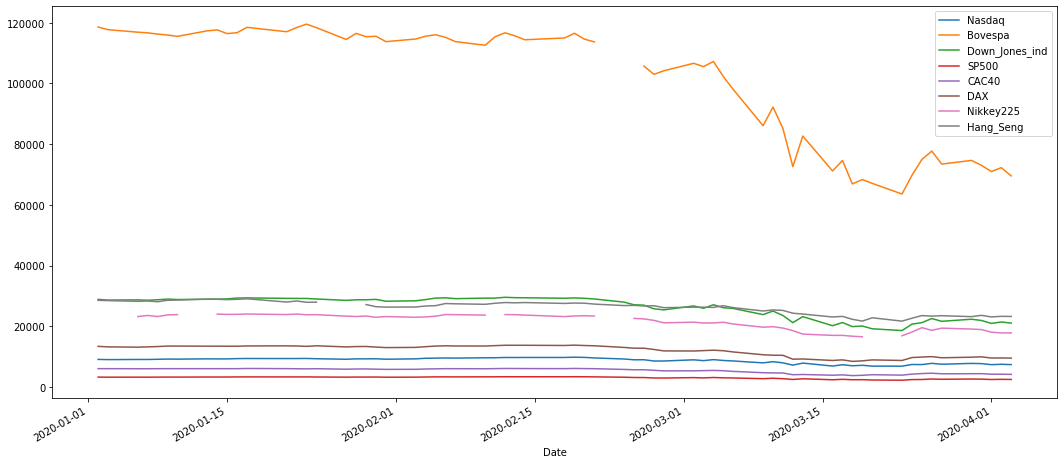

In [13]:
df_Close['2020-01-01':].plot(figsize = (18,8))

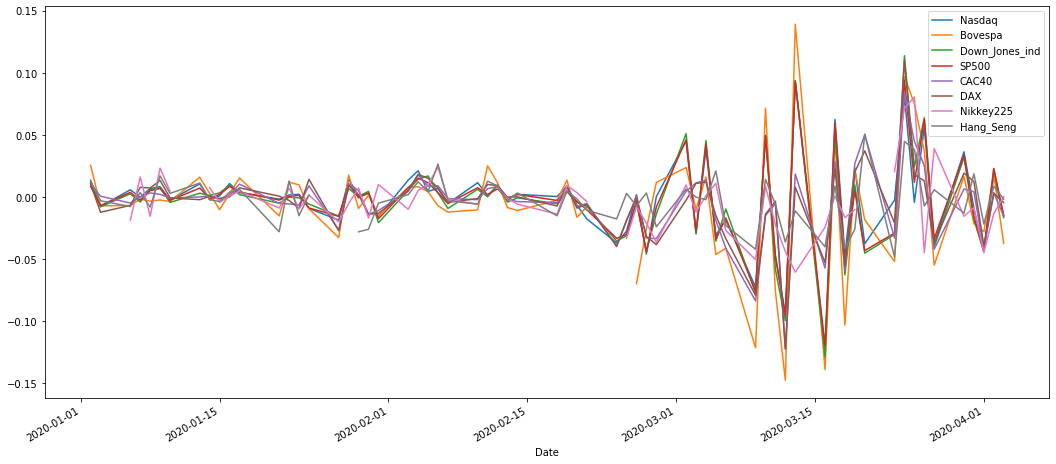

In [14]:
df_pct_change['2020-01-01':].plot(figsize = (18,8))

Nasdaq            0.926979
Bovespa           0.714164
Down_Jones_ind    0.799230
SP500             0.859409
CAC40             0.759274
DAX               0.796243
Nikkey225         0.818880
Hang_Seng         0.772550
Name: 2020-04-03 00:00:00, dtype: float64

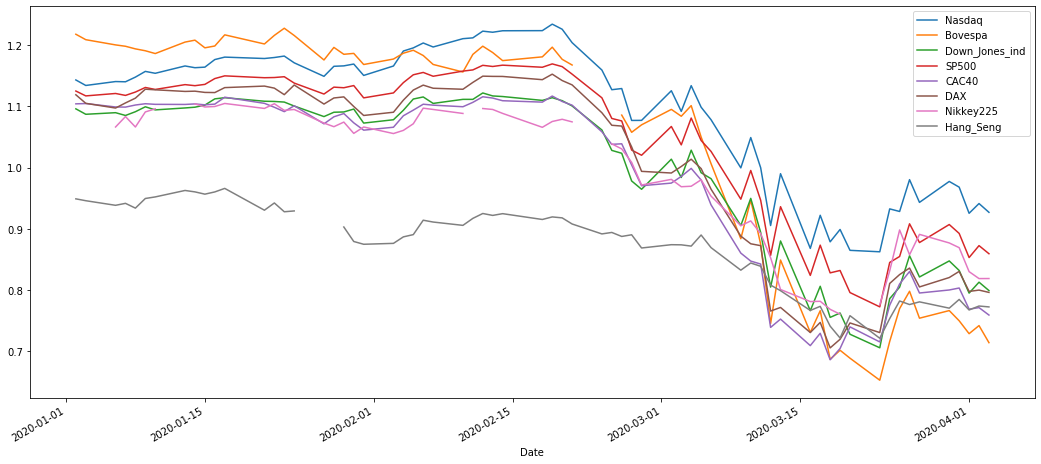

In [15]:
df_cum_prod['2020-01-01':].plot(figsize = (18,8))
df_cum_prod.iloc[-1]

# 3 - Creating DataFrames and CSV Files

## 3.1 - Printing existing dataframes 

In [16]:
for i in c_p_cp:
    print(i)

Close
pct_change
cum_prod


In [17]:
df_Close.head()

,Nasdaq,Bovespa,Down_Jones_ind,SP500,CAC40,DAX,Nikkey225,Hang_Seng
Date,,,,,,,,
2019-04-08,7953.88,97369.29,26341.02,2895.77,5471.78,11963.40,21761.65,30077.15
2019-04-09,7909.28,96291.79,26150.58,2878.20,5436.42,11850.57,21802.59,30157.49
2019-04-10,7964.24,95953.45,26157.16,2888.21,5449.88,11905.91,21687.57,30119.56
2019-04-11,7947.36,94754.70,26143.05,2888.32,5485.72,11935.20,21711.38,29839.45
2019-04-12,7984.16,92875.00,26412.30,2907.41,5502.70,11999.93,21870.56,29909.76


In [18]:
df_pct_change.head()

,Nasdaq,Bovespa,Down_Jones_ind,SP500,CAC40,DAX,Nikkey225,Hang_Seng
Date,,,,,,,,
2019-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-09,-0.005607,-0.011066,-0.007230,-0.006067,-0.006462,-0.009431,0.001881,0.002671
2019-04-10,0.006949,-0.003514,0.000252,0.003478,0.002476,0.004670,-0.005276,-0.001258
2019-04-11,-0.002119,-0.012493,-0.000539,0.000038,0.006576,0.002460,0.001098,-0.009300
2019-04-12,0.004630,-0.019838,0.010299,0.006609,0.003095,0.005423,0.007332,0.002356


In [19]:
df_pct_change.head()

,Nasdaq,Bovespa,Down_Jones_ind,SP500,CAC40,DAX,Nikkey225,Hang_Seng
Date,,,,,,,,
2019-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-09,-0.005607,-0.011066,-0.007230,-0.006067,-0.006462,-0.009431,0.001881,0.002671
2019-04-10,0.006949,-0.003514,0.000252,0.003478,0.002476,0.004670,-0.005276,-0.001258
2019-04-11,-0.002119,-0.012493,-0.000539,0.000038,0.006576,0.002460,0.001098,-0.009300
2019-04-12,0.004630,-0.019838,0.010299,0.006609,0.003095,0.005423,0.007332,0.002356


## 3.2 - Creating one csv file
<p> To save into a csv file we have to reset the index and save it</p>

In [20]:
df_Close.reset_index().to_csv('index01_close.csv', index = False)

## 3.3 - Creating all CSV files

In [21]:
for i in c_p_cp:
    exec("df_%s.reset_index().to_csv(\'index01_%s.csv\', index = False)"%(i,i))
    print(i)

Close
pct_change
cum_prod


### 3.3- Open and parsing the dates


In [22]:
df_Close_02 = pd.read_csv('index01_Close.csv', index_col = 0, parse_dates = True )

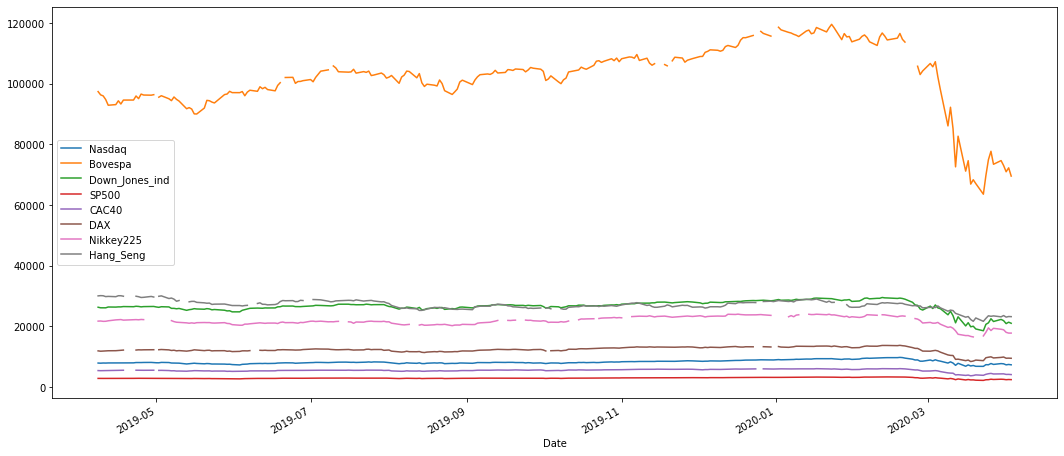

In [23]:
df_Close_02.plot(figsize = (18,8))

In [24]:
df_cum_prod_02 = pd.read_csv('index01_cum_prod.csv', index_col = 0, parse_dates= True)

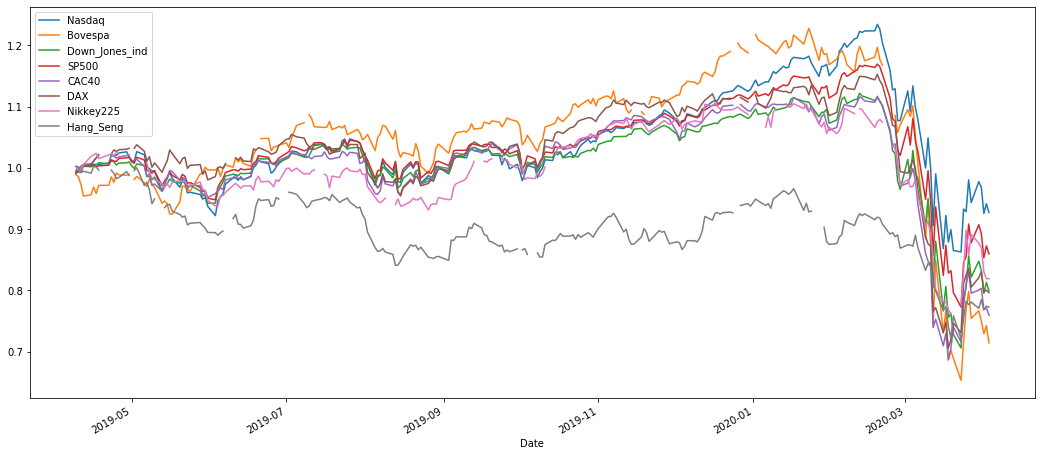

In [25]:
df_cum_prod_02.plot(figsize = (18,8))

### 4 - Selic data 

If you don't know the proper encoding use the chardet to open it in pandas

#### 4.1 - Opening and encoding

In [26]:
import chardet

In [27]:
with open('Selic.CSV', 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [28]:
result['encoding']

'ISO-8859-1'

In [29]:
start

datetime.datetime(2019, 4, 6, 20, 2, 33, 970726)

In [30]:
selic = pd.read_csv('Selic.CSV', encoding=result['encoding'], sep=';')

#### 4.2- Transforming the date into a datetime obj

In [31]:
selic.head()

,Data,Média,Fator Diário,Mínima,Taxa SELIC
0,02/01/1998,"38,11","1,00128209","35,85","35,76"
1,05/01/1998,"38,06","1,00128065","35,85","37,49"
2,06/01/1998,"38,07","1,00128094","35,85","37,94"
3,07/01/1998,"38,09","1,00128152","35,85","38,07"
4,08/01/1998,"38,1","1,0012818","35,29","38,04"


In [32]:
datetime.datetime.strptime(selic['Data'][0], '%d/%m/%Y')

datetime.datetime(1998, 1, 2, 0, 0)

In [1]:
#creating a function to apply into date column
def time_obj(obj):
    return datetime.datetime.strptime(obj, '%d/%m/%Y')

#### Obs: there's another way 

In [2]:
#selic['Data'] = pd.to_datetime(selic['Data'], format="%d/%m/%Y")
#selic.index = selic['Data']
#selic.index = selic.index.to_period('M') #"2000-12-01" => "2000-12"

In [34]:
selic['Data'].apply(time_obj)

0      1998-01-02
1      1998-01-05
2      1998-01-06
3      1998-01-07
4      1998-01-08
          ...    
5582   2020-03-27
5583   2020-03-30
5584   2020-03-31
5585   2020-04-01
5586   2020-04-02
Name: Data, Length: 5587, dtype: datetime64[ns]

In [35]:
selic['Data'] = selic['Data'].apply(time_obj)

In [36]:
selic.index = selic['Data']

In [37]:
selic.tail(15)

,Data,Média,Fator Diário,Mínima,Taxa SELIC
Data,,,,,
2020-03-13,2020-03-13,"4,15","1,00016137",-,"4,15"
2020-03-16,2020-03-16,"4,15","1,00016137",-,"4,15"
2020-03-17,2020-03-17,"4,15","1,00016137",-,"4,15"
2020-03-18,2020-03-18,"4,15","1,00016137",-,"4,15"
2020-03-19,2020-03-19,"3,65","1,00014227",-,"3,65"
2020-03-20,2020-03-20,"3,65","1,00014227",-,"3,65"
2020-03-23,2020-03-23,"3,65","1,00014227",-,"3,65"
2020-03-24,2020-03-24,"3,65","1,00014227",-,"3,65"
2020-03-25,2020-03-25,"3,65","1,00014227",-,"3,65"


#### 4.3 - selecting data from 1 year until now

In [38]:
def r_str(date):
    """
    input: datetime object
    output: str "YYYY-MM-DD"
    """
    return str(str(date.year) +'-' +str(date.month) +'-'+str(date.day))

In [39]:
selic = selic[r_str(start):]

In [40]:
selic.tail(15)

,Data,Média,Fator Diário,Mínima,Taxa SELIC
Data,,,,,
2020-03-13,2020-03-13,"4,15","1,00016137",-,"4,15"
2020-03-16,2020-03-16,"4,15","1,00016137",-,"4,15"
2020-03-17,2020-03-17,"4,15","1,00016137",-,"4,15"
2020-03-18,2020-03-18,"4,15","1,00016137",-,"4,15"
2020-03-19,2020-03-19,"3,65","1,00014227",-,"3,65"
2020-03-20,2020-03-20,"3,65","1,00014227",-,"3,65"
2020-03-23,2020-03-23,"3,65","1,00014227",-,"3,65"
2020-03-24,2020-03-24,"3,65","1,00014227",-,"3,65"
2020-03-25,2020-03-25,"3,65","1,00014227",-,"3,65"


In [41]:
del(selic['Média'],selic['Data'], selic['Mínima'])

In [42]:
selic.head()

,Fator Diário,Taxa SELIC
Data,,
2019-04-08,"1,0002462","6,4"
2019-04-09,"1,0002462","6,4"
2019-04-10,"1,0002462","6,4"
2019-04-11,"1,0002462","6,4"
2019-04-12,"1,0002462","6,4"


In [43]:
selic.describe()

,Fator Diário,Taxa SELIC
count,251,251
unique,7,7
top,"1,0002462","6,4"
freq,80,80


In [44]:
selic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-04-08 to 2020-04-02
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Fator Diário  251 non-null    object
 1   Taxa SELIC    251 non-null    object
dtypes: object(2)
memory usage: 5.9+ KB


#### 4.4 Using apply to transform str into float

In [45]:
type(selic[selic.columns[1]][0])

str

In [46]:
#testing some function
float(selic[selic.columns[1]][0].replace(',','.'))

6.4

In [47]:
#creating a function
def r_float(data_str):
    """
    input: number in str
    return: float
    """
    return float(data_str.replace(',','.'))


In [48]:
r_float(selic[selic.columns[1]][0])

6.4

In [49]:
type(selic[selic.columns[1]])

pandas.core.series.Series

In [50]:
#selic[selic.columns[0]] = selic[selic.columns[0]].apply(r_float) 
for i in range(len(selic.columns)):
    
    selic[selic.columns[i]] = selic[selic.columns[i]].apply(r_float)

In [51]:
selic.sort_index().tail(20)

,Fator Diário,Taxa SELIC
Data,,
2020-03-06,1.000161,4.15
2020-03-09,1.000161,4.15
2020-03-10,1.000161,4.15
2020-03-11,1.000161,4.15
2020-03-12,1.000161,4.15
2020-03-13,1.000161,4.15
2020-03-16,1.000161,4.15
2020-03-17,1.000161,4.15
2020-03-18,1.000161,4.15


In [52]:
selic['cum_prod'] = selic['Fator Diário'].cumprod()

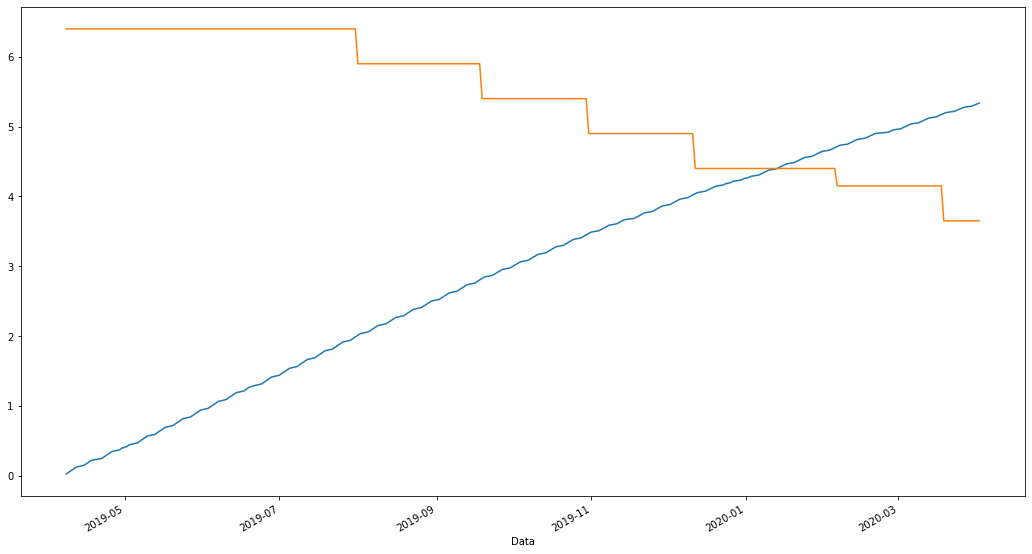

In [53]:
plt.figure(figsize  = (18,10))
((selic['cum_prod']-1)*100).plot()
selic['Taxa SELIC'].plot()

In [54]:
selic

,Fator Diário,Taxa SELIC,cum_prod
Data,,,
2019-04-08,1.000246,6.40,1.000246
2019-04-09,1.000246,6.40,1.000492
2019-04-10,1.000246,6.40,1.000739
2019-04-11,1.000246,6.40,1.000985
2019-04-12,1.000246,6.40,1.001232
...,...,...,...
2020-03-27,1.000142,3.65,1.052774
2020-03-30,1.000142,3.65,1.052924
2020-03-31,1.000142,3.65,1.053074


In [55]:
selic.reset_index().to_csv('selic01.csv', index = False)

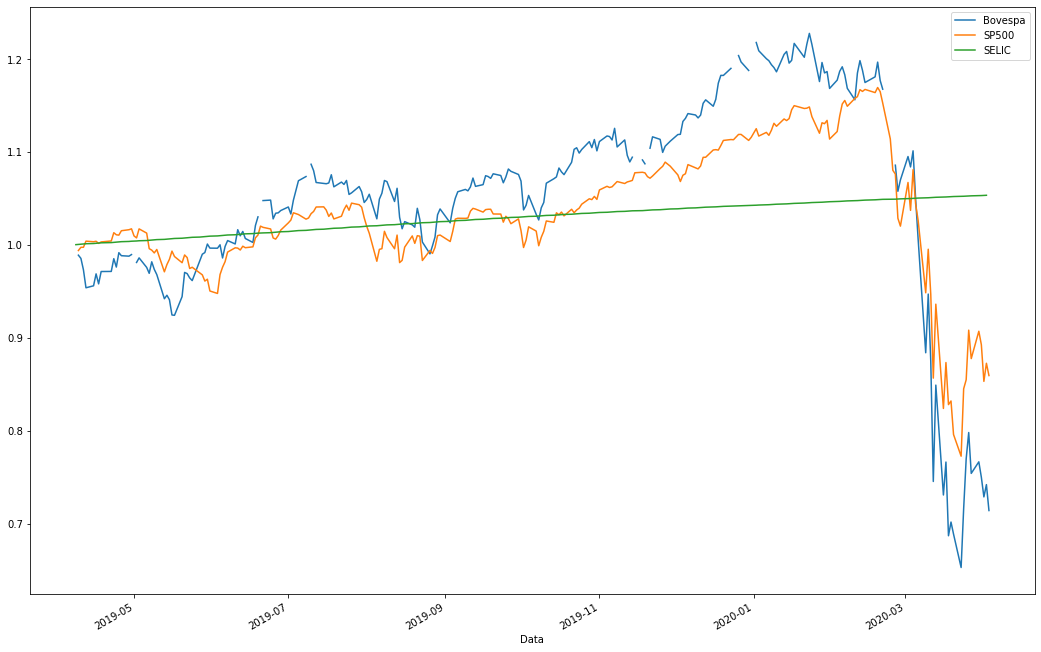

In [56]:
plt.figure(figsize = (18,12))
df_cum_prod['Bovespa'].plot()
df_cum_prod['SP500'].plot()
selic['cum_prod'].plot(label  = 'SELIC')
plt.legend()